# Introduction

In this notebook, I would like to investigate the use of pairwise covariance matrices to impute data.

## Simulated Data

First off, let's simulate data drawn from a multivariate normal. Three columns of data, columns A, B, and C, for which we know the ground-truth covariance matrix between all 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import janitor
import numpy_sugar as ns

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def extract_diagonal(M):
    diag = np.zeros((M.shape[0], M.shape[1]))
    np.fill_diagonal(diag, np.diagonal(M))
    return diag

In [21]:
n_variates = 5
triangle = np.random.random(size=(n_variates, n_variates))
cov = np.triu(triangle, k=1) + np.triu(triangle, k=1).T + extract_diagonal(triangle)

mean = np.random.random(size=(n_variates))

In [22]:
cov

array([[0.31385228, 0.60977505, 0.72741806, 0.60740167, 0.81248334],
       [0.60977505, 0.37355032, 0.82427794, 0.85385602, 0.66121006],
       [0.72741806, 0.82427794, 0.12075115, 0.82780063, 0.22315742],
       [0.60740167, 0.85385602, 0.82780063, 0.03651504, 0.26919202],
       [0.81248334, 0.66121006, 0.22315742, 0.26919202, 0.23555706]])

In [23]:
ns.linalg.check_semidefinite_positiveness(cov)

False

In [24]:
np.linalg.cond(cov)

13.486262364904109

In [25]:
data = np.random.multivariate_normal(
    mean=mean, 
    cov=cov, 
    size=10_000_000
)
df = pd.DataFrame(data)

/home/ericmjl/anaconda/envs/bayesian/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


In [17]:
data.shape

(10000000, 3)

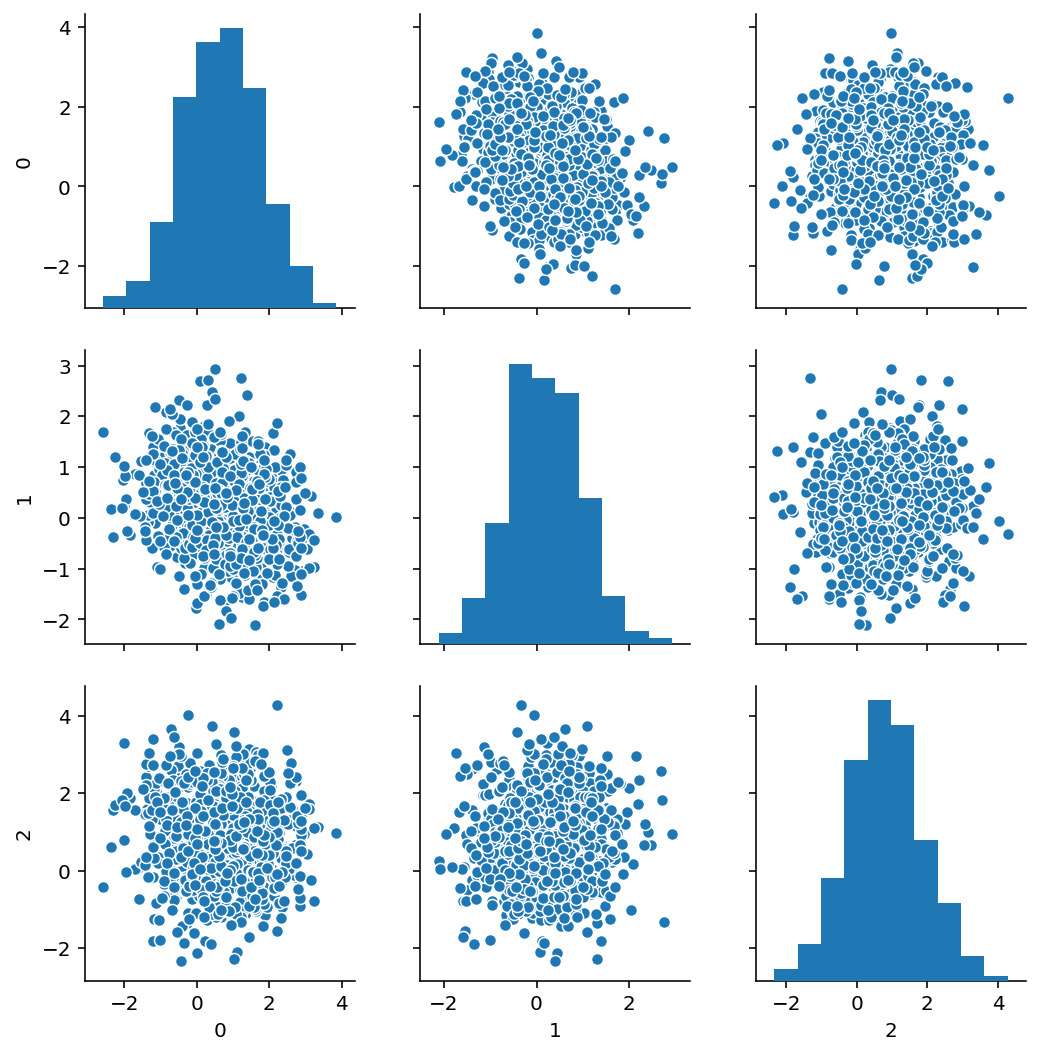

In [18]:
sns.pairplot(pd.DataFrame(data).sample(1000))

Now, let's simulate the case where a dropout mask is applied on 99% of the data.

In [9]:
mask = np.random.binomial(n=1, p=0.01, size=data.shape)

In [10]:
ind = np.where(mask.flatten() == 0)
ind

(array([       0,        1,        2, ..., 49999997, 49999998, 49999999]),)

In [11]:
data_masked = mask * data

In [12]:
np.put(data_masked, ind, np.nan)

In [13]:
pd.DataFrame(data_masked)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,-2.798164,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [14]:
import missingno as msno


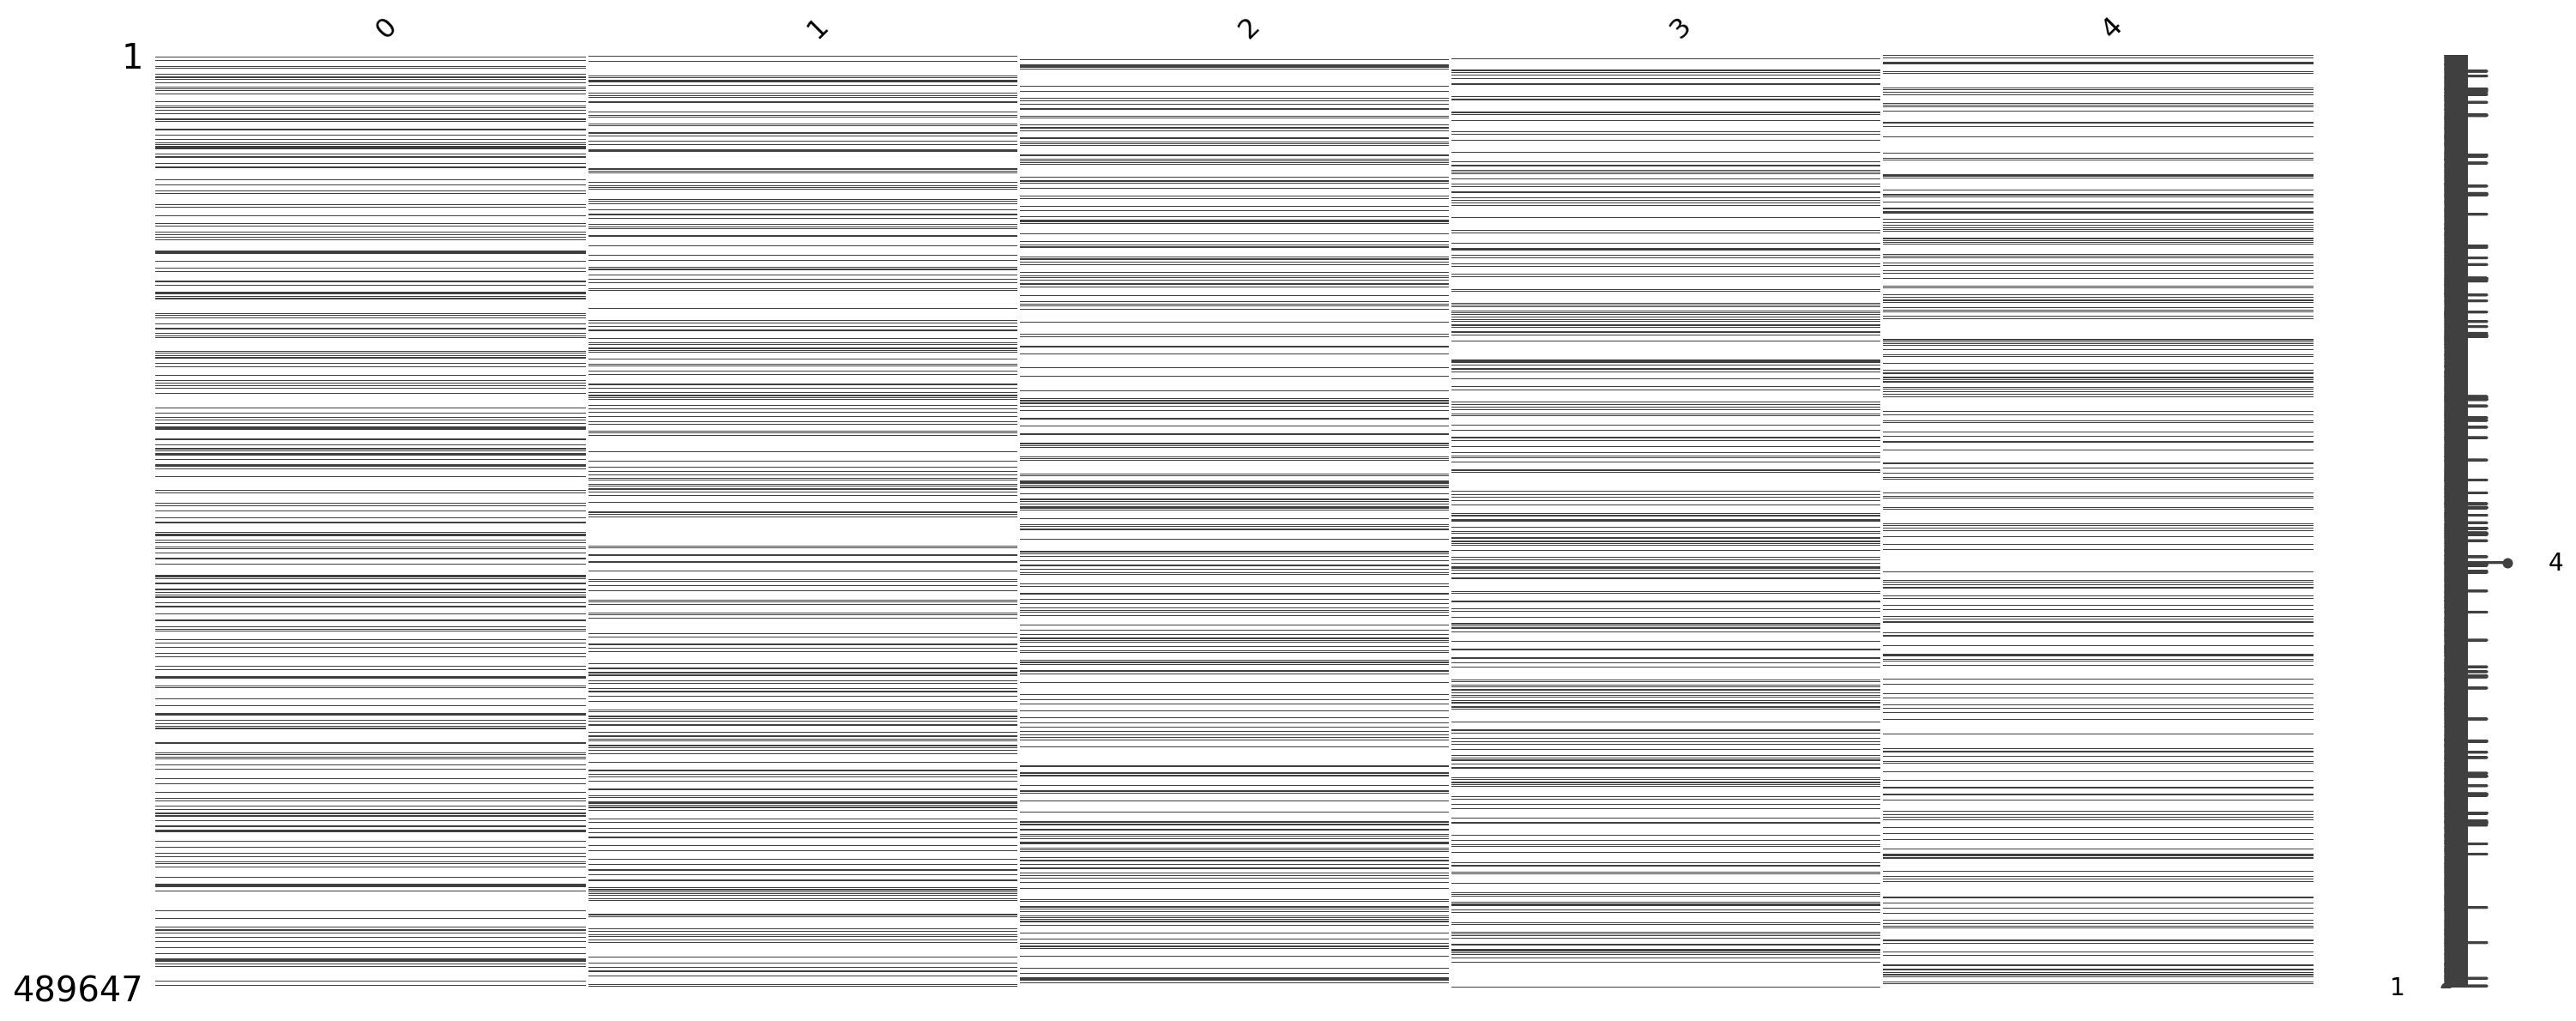

In [15]:
df_masked = pd.DataFrame(data_masked).dropna(how='all')
msno.matrix(df_masked)

In [16]:
import janitor

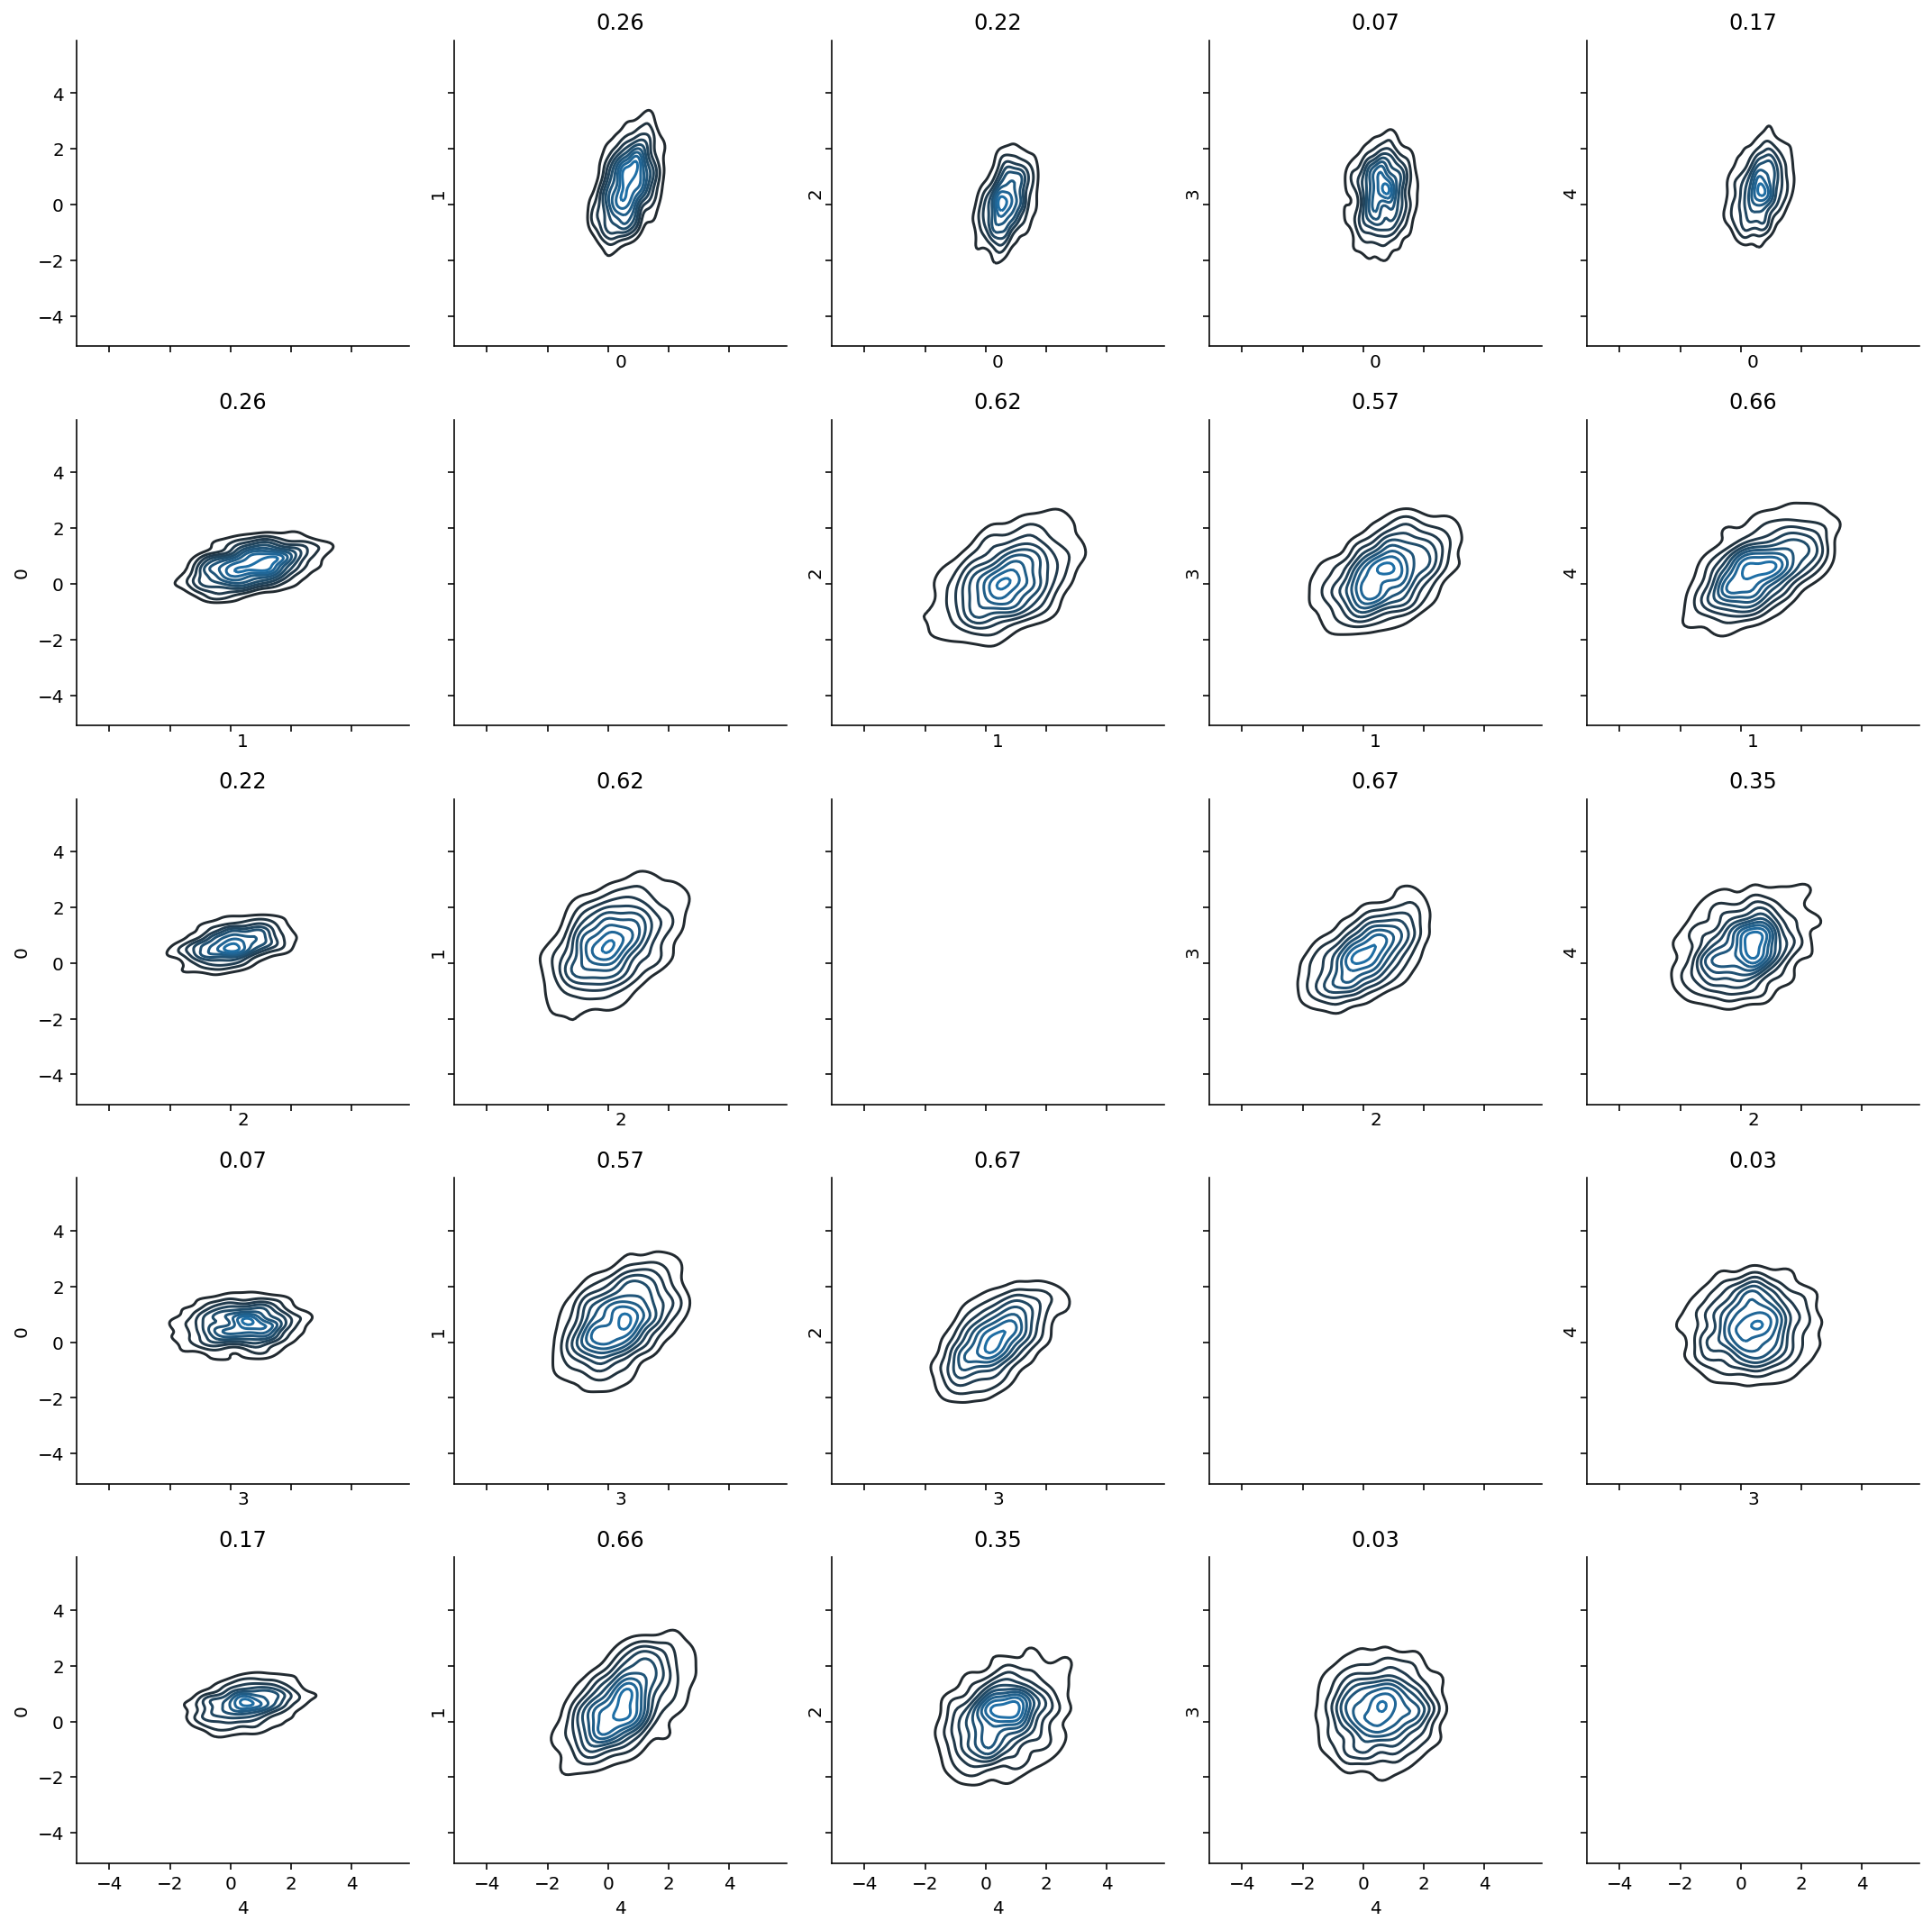

In [17]:
from itertools import combinations
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15), nrows=n_variates, ncols=n_variates, sharex=True, sharey=True)

covars = dict()
for r, c in combinations(df_masked.columns, 2):
    df_filtered = df_masked[[r, c]].dropna()
    sns.kdeplot(data=df_filtered[r], data2=df_filtered[c], ax=ax[r, c])
    sns.kdeplot(data=df_filtered[c], data2=df_filtered[r], ax=ax[c, r])
    # ax[r, c].scatter(df_filtered[r], df_filtered[c])
    # ax[c, r].scatter(df_filtered[c], df_filtered[r])
    covar = np.cov(df_filtered.T)
    ax[r, c].set_title(f"{covar[0, 1]:.2f}")
    ax[c, r].set_title(f"{covar[1, 0]:.2f}")
    
    covars[(r, c)] = covar
    covars[(c, r)] = covar
plt.tight_layout()

Now, let's say I have a new sample for which I only have data from column 0 and 1. Can we combine this information in a mathematically principled fashion so as to recover measurement of column 2 with uncertainty?

In [192]:
df_unknown2 = df_masked.dropna(subset=[0, 1], how='any').dropnotnull(4)

In [194]:
df_unknown2

,0,1,2,3,4
10408,0.150532,-0.824141,NaN,NaN,NaN
21632,-0.633014,-1.330958,NaN,NaN,NaN
22373,0.190275,0.582273,NaN,NaN,NaN
30425,1.414987,1.098055,NaN,NaN,NaN
30532,1.233849,1.219678,NaN,NaN,NaN
36693,-0.080780,0.247758,NaN,NaN,NaN
41566,0.544910,0.400895,NaN,NaN,NaN
43481,-0.556573,-0.116066,NaN,NaN,NaN
51806,1.394208,0.400142,NaN,NaN,NaN
53024,-0.060240,0.649141,NaN,NaN,NaN


In [195]:
from pprint import pprint

pprint(covars)

{(0, 1): array([[0.55801982, 0.42593982],
       [0.42593982, 0.79690886]]),
 (0, 2): array([[0.5771407 , 0.65885873],
       [0.65885873, 1.30846317]]),
 (0, 3): array([[0.55548822, 0.30514159],
       [0.30514159, 1.02738112]]),
 (0, 4): array([[0.5950965, 0.555712 ],
       [0.555712 , 0.8529676]]),
 (1, 0): array([[0.55801982, 0.42593982],
       [0.42593982, 0.79690886]]),
 (1, 2): array([[0.75555095, 0.44113883],
       [0.44113883, 1.28036146]]),
 (1, 3): array([[0.76744565, 0.48366567],
       [0.48366567, 1.04773716]]),
 (1, 4): array([[0.77515802, 0.23183727],
       [0.23183727, 0.86264261]]),
 (2, 0): array([[0.5771407 , 0.65885873],
       [0.65885873, 1.30846317]]),
 (2, 1): array([[0.75555095, 0.44113883],
       [0.44113883, 1.28036146]]),
 (2, 3): array([[1.36156702, 0.43711758],
       [0.43711758, 1.08436579]]),
 (2, 4): array([[1.43547879, 0.83495197],
       [0.83495197, 0.95011231]]),
 (3, 0): array([[0.55548822, 0.30514159],
       [0.30514159, 1.02738112]]),
 (3

By the fundamental rule of multivariate normals, if we have a bivariate Normal distribution:

$$ X_1 X_2 \sim N(\mu, \Sigma)$$

Then if we know the value of $X_2=x_2$, then $X_1$ follows a distribution:

$$ X_1 \sim N(\mu_{1|2}, \Sigma_{1|2})$$

where 

$$\mu_{1|2} = \mu_1 + \Sigma_{12}\Sigma^{-1}_{22}(x_2-\mu_2)$$

and

$$\Sigma_{1|2} = \Sigma_{11} - \Sigma_{12} \Sigma^{-1}_{22} \Sigma_{21}$$

Thanks to the magic of Python, we can encode this in a function. Given two columns of data, we can estimate $\mu_1$ and $\mu_2$ and the covariance matrix $\Sigma$.

In [ ]:
def mu_cond(mu, sig, x):
    """
    Compute Gaussian mean conditioned on x (observed data).
    
    x should always have fewer entries than mu, and is assumed to 
    be aligned with the last set of entries in mu and sig.
    """
    
    

In [21]:
mu = df_masked.mean().values
mu

array([-1.45063357e-03,  5.99798988e+00,  2.00441501e+00])

In [22]:
covars[(0, 2)]

# sigma = np.cov()

array([[0.94225467, 0.8582759 ],
       [0.8582759 , 0.98306504]])

In [23]:
def mu_2g1(mu: np.ndarray, cov: np.ndarray, x_1: float):
    """
    :param mu: length-2 vector of mus.
    :param cov: 2x2 square covariance matrix.
    :param x_2: Known measurement.
    """
    sigma_21 = cov[1, 0]
    sigma_11 = cov[0, 0]
    mu_1 = mu[0]
    mu_2 = mu[1]
    return mu_2 + sigma_21 * 1 / sigma_11 * (x_1 - mu_1)

idx = df_unknown2.index[0]
print(mu_2g1(mu[[0, 2]], covars[(0, 2)], x_1=df_unknown2.loc[idx, 0]))
print(mu_2g1(mu[[1, 2]], covars[(1, 2)], x_1=df_unknown2.loc[idx, 1]))

2.9551250551293626
2.3160394305415353


In [24]:
def sig_2g1(cov):
    """
    :param cov: 2x2 covariance matrix.
    """
    if not cov.shape == (2, 2):
        raise ValueError("cov must be a 2x2 matrix")
    return cov[1, 1] - cov[1, 0] * 1 / cov[0, 0] * cov[0, 1]

pprint(sig_2g1(covars[(0, 2)]))
pprint(sig_2g1(covars[(1, 2)]))

0.2012832632484679
0.3392207734774968


In [25]:
df_masked[[0, 2]].mean().values

array([-1.45063357e-03,  2.00441501e+00])

In [26]:
def mu_sig(known_col, unknown_col):
    idx = df_unknown2.index[0]
    x_known = df_unknown2.loc[idx, known_col]
    mu = df_masked[[known_col, unknown_col]].mean().values
    cov = covars[(known_col, unknown_col)]
    mu = mu_2g1(mu, cov, x_known)
    sig = sig_2g1(cov)
    return mu, sig

In [27]:
mu_sig(0, 2)

(2.9551250551293626, 0.2012832632484679)

In [28]:
mu_sig(1, 2)

(2.3160394305415353, 0.3392207734774968)

In [29]:
from scipy.stats import norm

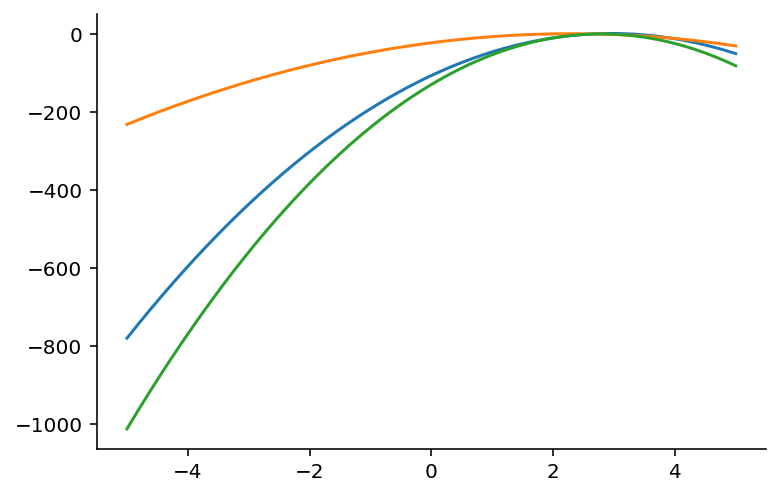

In [30]:
x = np.linspace(-5, 5, 1000)
logpdf1 = norm(*mu_sig(0, 2)).logpdf(x)
pdf1 = norm(*mu_sig(0, 2)).pdf(x)

logpdf2 = norm(*mu_sig(1, 2)).logpdf(x)
pdf2 = norm(*mu_sig(1, 2)).pdf(x)

plt.plot(x, logpdf1)
plt.plot(x, logpdf2)
plt.plot(x, logpdf1 + logpdf2)

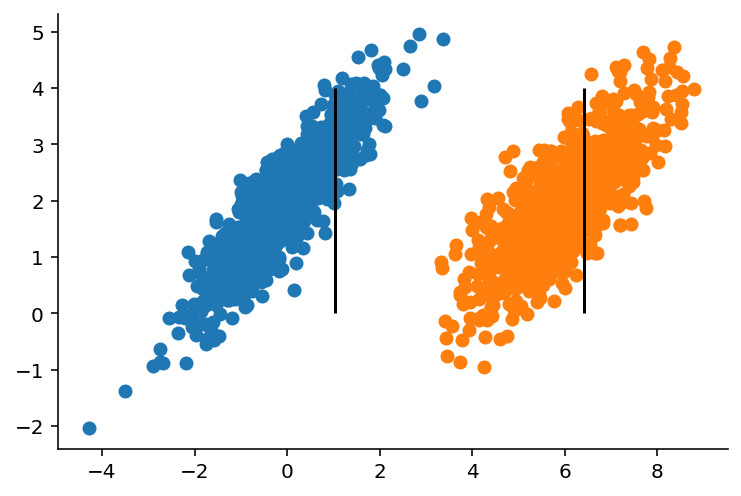

In [31]:
r = 0
c = 2
df_filtered = df_masked[[r, c]].dropna()
plt.scatter(*df_filtered.T.values)
plt.vlines(x=df_unknown2.loc[idx, r], ymin=0, ymax=4)

r = 1
c = 2
df_filtered = df_masked[[r, c]].dropna()
plt.scatter(*df_filtered.T.values)
plt.vlines(x=df_unknown2.loc[idx, r], ymin=0, ymax=4)


In [32]:
idx = df_unknown2.index[0]
df.loc[idx]

0    1.042282
1    6.409348
2    3.211660
Name: 2282, dtype: float64

In [33]:
sumlogpdf = logpdf1 + logpdf2
x[np.where(sumlogpdf == sumlogpdf.max())]

array([2.78778779])

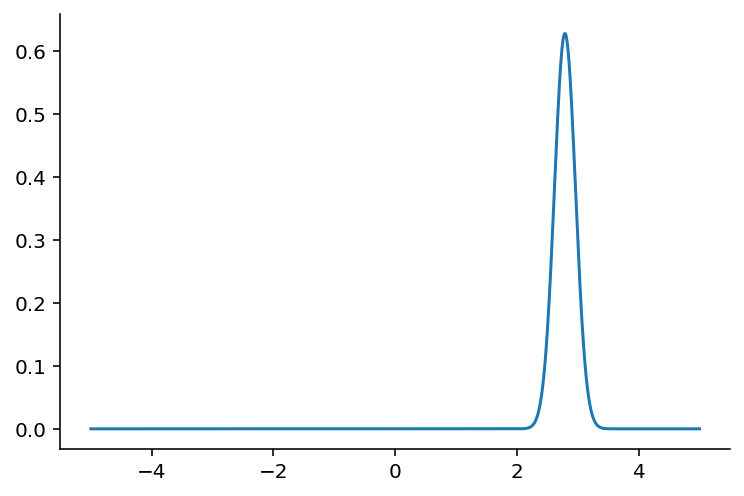

In [35]:
plt.plot(x, pdf1 * pdf2)

It works! We can use fully probabilistic methods that are mathematically principled to obtain estimates of unknown data, given that we know the joint distribution.